In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

### Read in the raw data

In [2]:
cases_raw_df = pd.read_csv('../data/RAW_us_confirmed_cases.csv')
cases_conv_df = pd.read_csv('../data/CONVENIENT_us_confirmed_cases.csv', header=[0,1])
deaths_raw_df = pd.read_csv('../data/RAW_us_deaths.csv')
deaths_conv_df = pd.read_csv('../data/CONVENIENT_us_deaths.csv', header=[0,1])
mask_df = pd.read_csv('../data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')

In [3]:
cases_raw_df

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5119,5119,5152,5164,5168,5185,5204,5204,5204,5218
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3781,3781,3794,3805,3814,3817,3829,3829,3829,3843
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1677,1677,1690,1700,1715,1719,1731,1731,1731,1745


In [4]:
cases_conv_df

Province_State Alabama                                              \
            Admin2 Autauga Baldwin Barbour  Bibb Blount Bullock Butler   
0          1/23/20     0.0     0.0     0.0   0.0    0.0     0.0    0.0   
1          1/24/20     0.0     0.0     0.0   0.0    0.0     0.0    0.0   
2          1/25/20     0.0     0.0     0.0   0.0    0.0     0.0    0.0   
3          1/26/20     0.0     0.0     0.0   0.0    0.0     0.0    0.0   
4          1/27/20     0.0     0.0     0.0   0.0    0.0     0.0    0.0   
..             ...     ...     ...     ...   ...    ...     ...    ...   
644       10/28/21   136.0    25.0     1.0  13.0   26.0     1.0   10.0   
645       10/29/21     9.0    22.0     0.0   1.0    7.0     0.0    1.0   
646       10/30/21    11.0    26.0     3.0   2.0   24.0    -1.0    3.0   
647       10/31/21    13.0    16.0     2.0   1.0   11.0     0.0    2.0   
648        11/1/21     6.0    11.0     0.0   2.0    2.0     0.0    2.0   

                      ... Wyoming                                            \
    Calhoun Chambers  ...    Park Platte Sheridan Sublette Sweetwater Teton   
0       0.0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   
1       0.0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   
2       0.0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   
3       0.0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   
4       0.0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   
..      ...      ...  ...     ...    ...      ...      ...        ...   ...   
644    15.0     53.0  ...    15.0    2.0     37.0      7.0       24.0  17.0   
645    16.0     -1.0  ...    19.0    1.0     41.0      5.0       42.0  19.0   
646    15.0     -1.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   
647     7.0      5.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   
648     2.0      1.0  ...    42.0   17.0     35.0      6.0       42.0  14.0   

                                      
    Uinta Unassigned Washakie Weston  
0     0.0        0.0      0.0    0.0  
1     0.0        0.0      0.0    0.0  
2     0.0        0.0      0.0    0.0  
3     0.0        0.0      0.0    0.0  
4     0.0        0.0      0.0    0.0  
..    ...        ...      ...    ...  
644   3.0        0.0      4.0   29.0  
645  12.0        0.0     12.0    9.0  
646   0.0        0.0      0.0    0.0  
647   0.0        0.0      0.0    0.0  
648  14.0        0.0     14.0   12.0  

[649 rows x 3343 columns]

### Process cases and deaths dataframes

In [5]:
# Extract only the column for Oakland, MI and the column of dates.
oakland_cases_df = pd.DataFrame(cases_conv_df['Michigan']['Oakland'])
dates_df = pd.DataFrame(cases_conv_df['Province_State']['Admin2'])

# Concat the Oakland case column with the dates.
oakland_cases_df = pd.concat([dates_df, oakland_cases_df], axis=1).rename(columns={'Admin2': 'Date', 'Oakland': 'Cases'})

# Convert the Date column to the correct type and keep only the dates we want.
oakland_cases_df['Date'] = pd.to_datetime(oakland_cases_df['Date'])
keep_range = (oakland_cases_df['Date'] >= '2020-2-1') & (oakland_cases_df['Date'] <= '2021-10-15')
oakland_cases_df = oakland_cases_df.loc[keep_range]

# Compute a moving average to remove the Monday spikes. Compute cumulative case count.
oakland_cases_df['Cases Moving Average'] = oakland_cases_df.Cases.rolling(window=7).mean().round()
oakland_cases_df['Cases Cumulative'] = oakland_cases_df['Cases'].cumsum()

oakland_cases_df

,Date,Cases,Cases Moving Average,Cases Cumulative
9,2020-02-01,0.0,NaN,0.0
10,2020-02-02,0.0,NaN,0.0
11,2020-02-03,0.0,NaN,0.0
12,2020-02-04,0.0,NaN,0.0
13,2020-02-05,0.0,NaN,0.0
...,...,...,...,...
627,2021-10-11,887.0,399.0,139998.0
628,2021-10-12,0.0,399.0,139998.0
629,2021-10-13,926.0,398.0,140924.0
630,2021-10-14,0.0,398.0,140924.0


In [6]:
# Extract only the column for Oakland, MI and the column of dates.
oakland_deaths_df = pd.DataFrame(deaths_conv_df['Michigan']['Oakland'])
dates_df = pd.DataFrame(deaths_conv_df['Province_State']['Admin2'])

# Concat the Oakland deaths column with the dates.
oakland_deaths_df = pd.concat([dates_df, oakland_deaths_df], axis=1).rename(columns={'Admin2': 'Date', 'Oakland': 'Deaths'})

# Convert the Date column to the correct type and keep only the dates we want.
oakland_deaths_df['Date'] = pd.to_datetime(oakland_deaths_df['Date'])
keep_range = (oakland_deaths_df['Date'] >= '2020-2-1') & (oakland_deaths_df['Date'] <= '2021-10-15')
oakland_deaths_df = oakland_deaths_df.loc[keep_range]

# Compute a moving average to remove the Monday spikes. Compute cumulative case count.
oakland_deaths_df['Deaths Moving Average'] = oakland_deaths_df.Deaths.rolling(window=7).mean().round()
oakland_deaths_df['Deaths Cumulative'] = oakland_deaths_df['Deaths'].cumsum()

oakland_deaths_df

,Date,Deaths,Deaths Moving Average,Deaths Cumulative
9,2020-02-01,0.0,NaN,0.0
10,2020-02-02,0.0,NaN,0.0
11,2020-02-03,0.0,NaN,0.0
12,2020-02-04,0.0,NaN,0.0
13,2020-02-05,0.0,NaN,0.0
...,...,...,...,...
627,2021-10-11,4.0,2.0,2617.0
628,2021-10-12,0.0,2.0,2617.0
629,2021-10-13,11.0,3.0,2628.0
630,2021-10-14,0.0,3.0,2628.0


In [7]:
oakland_cases_df = pd.merge(oakland_cases_df, oakland_deaths_df, how='left', on='Date')

# 2020 population: 1274395
oakland_cases_df['Susceptible Population'] = 1274395 - oakland_cases_df['Deaths Cumulative'] - oakland_cases_df['Cases Cumulative']

oakland_cases_df['Rate of Infection'] = (oakland_cases_df['Cases Moving Average'] / oakland_cases_df['Susceptible Population']) * 100
oakland_cases_df['Rate of Daily Infection'] = (oakland_cases_df['Cases'] / oakland_cases_df['Susceptible Population']) * 100

oakland_cases_df['Rate of Cases'] = ((oakland_cases_df['Cases Moving Average'].diff()) / 1274395) * 100
oakland_cases_df['Rate of Daily Cases'] = ((oakland_cases_df['Cases'].diff()) / 1274395) * 100

oakland_cases_df

,Date,Cases,Cases Moving Average,Cases Cumulative,Deaths,Deaths Moving Average,Deaths Cumulative,Susceptible Population,Rate of Infection,Rate of Daily Infection,Rate of Cases,Rate of Daily Cases
0,2020-02-01,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,NaN
1,2020-02-02,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000
2,2020-02-03,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000
3,2020-02-04,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000
4,2020-02-05,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
618,2021-10-11,887.0,399.0,139998.0,4.0,2.0,2617.0,1131780.0,0.035254,0.078372,0.000000,0.069602
619,2021-10-12,0.0,399.0,139998.0,0.0,2.0,2617.0,1131780.0,0.035254,0.000000,0.000000,-0.069602
620,2021-10-13,926.0,398.0,140924.0,11.0,3.0,2628.0,1130843.0,0.035195,0.081886,-0.000078,0.072662
621,2021-10-14,0.0,398.0,140924.0,0.0,3.0,2628.0,1130843.0,0.035195,0.000000,0.000000,-0.072662


In [8]:
oakland_cases_df.tail()

,Date,Cases,Cases Moving Average,Cases Cumulative,Deaths,Deaths Moving Average,Deaths Cumulative,Susceptible Population,Rate of Infection,Rate of Daily Infection,Rate of Cases,Rate of Daily Cases
618,2021-10-11,887.0,399.0,139998.0,4.0,2.0,2617.0,1131780.0,0.035254,0.078372,0.000000,0.069602
619,2021-10-12,0.0,399.0,139998.0,0.0,2.0,2617.0,1131780.0,0.035254,0.000000,0.000000,-0.069602
620,2021-10-13,926.0,398.0,140924.0,11.0,3.0,2628.0,1130843.0,0.035195,0.081886,-0.000078,0.072662
621,2021-10-14,0.0,398.0,140924.0,0.0,3.0,2628.0,1130843.0,0.035195,0.000000,0.000000,-0.072662
622,2021-10-15,858.0,382.0,141782.0,10.0,4.0,2638.0,1129975.0,0.033806,0.075931,-0.001255,0.067326


### Process mask mandate df

In [9]:
mask_df.tail()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
1593864,VI,St. Thomas Island,78,30,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593865,VI,St. Thomas Island,78,30,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593866,VI,St. Thomas Island,78,30,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593867,VI,St. Thomas Island,78,30,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593868,VI,St. Thomas Island,78,30,8/15/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."


In [10]:
oakland_mask_df = mask_df.loc[mask_df.County_Name == 'Oakland County']

# Convert the date column to the correct type and keep only the specified range
oakland_mask_df['date'] = pd.to_datetime(oakland_mask_df['date'])
keep_range = (oakland_mask_df['date'] >= '2020-2-1') & (oakland_mask_df['date'] <= '2021-10-15')
oakland_mask_df = oakland_mask_df.loc[keep_range].rename(columns={'date': 'Date'})

# We will use the 'Face_Masks_Required_in_Public' field. Convert values to bools.
oakland_mask_df[['Face_Masks_Required_in_Public_Embedded']] = oakland_mask_df[['Face_Masks_Required_in_Public']].replace({"Yes": 1, "No": 0})

oakland_mask_df = oakland_mask_df[['Date', 'Face_Masks_Required_in_Public']]

oakland_mask_df

<ipython-input-10-e016fca82ce7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oakland_mask_df['date'] = pd.to_datetime(oakland_mask_df['date'])


,Date,Face_Masks_Required_in_Public
344044,2020-04-10,NaN
344045,2020-04-11,NaN
344046,2020-04-12,NaN
344047,2020-04-13,NaN
344048,2020-04-14,NaN
...,...,...
1153711,2021-08-11,No
1153712,2021-08-12,No
1153713,2021-08-13,No
1153714,2021-08-14,No


### Merge mask mandate df with cases & deaths df

In [11]:
oakland_combined_df = pd.merge(oakland_cases_df, oakland_mask_df, how='left', on='Date')

oakland_combined_df

,Date,Cases,Cases Moving Average,Cases Cumulative,Deaths,Deaths Moving Average,Deaths Cumulative,Susceptible Population,Rate of Infection,Rate of Daily Infection,Rate of Cases,Rate of Daily Cases,Face_Masks_Required_in_Public
0,2020-02-01,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,NaN,NaN
1,2020-02-02,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000,NaN
2,2020-02-03,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000,NaN
3,2020-02-04,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000,NaN
4,2020-02-05,0.0,NaN,0.0,0.0,NaN,0.0,1274395.0,NaN,0.000000,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2021-10-11,887.0,399.0,139998.0,4.0,2.0,2617.0,1131780.0,0.035254,0.078372,0.000000,0.069602,NaN
619,2021-10-12,0.0,399.0,139998.0,0.0,2.0,2617.0,1131780.0,0.035254,0.000000,0.000000,-0.069602,NaN
620,2021-10-13,926.0,398.0,140924.0,11.0,3.0,2628.0,1130843.0,0.035195,0.081886,-0.000078,0.072662,NaN
621,2021-10-14,0.0,398.0,140924.0,0.0,3.0,2628.0,1130843.0,0.035195,0.000000,0.000000,-0.072662,NaN


### Separate data into pre-masking, during masking, post-masking, unknown

In [12]:
# masks_enforced_df = oakland_cases_df.loc[oakland_cases_df.Face_Masks_Required_in_Public == 'Yes']
# masks_not_enforced_df = oakland_cases_df.loc[oakland_cases_df.Face_Masks_Required_in_Public == 'No']
# masks_na_df = oakland_cases_df.loc[oakland_cases_df.Face_Masks_Required_in_Public.isna()]

pre_mask_range = (oakland_combined_df['Date'] >= '2020-2-1') & (oakland_combined_df['Date'] <= '2020-4-25')
mask1_range = (oakland_combined_df['Date'] >= '2020-4-26') & (oakland_combined_df['Date'] <= '2020-10-1')
no_mask_range = (oakland_combined_df['Date'] >= '2020-10-2') & (oakland_combined_df['Date'] <= '2020-10-4')
mask2_range = (oakland_combined_df['Date'] >= '2020-10-5') & (oakland_combined_df['Date'] <= '2021-6-21')
post_mask_range = (oakland_combined_df['Date'] >= '2021-6-22') & (oakland_combined_df['Date'] <= '2021-10-15')


pre_mask_df = oakland_combined_df.loc[pre_mask_range]
mask1_df = oakland_combined_df.loc[mask1_range]
no_mask_df = oakland_combined_df.loc[no_mask_range]
mask2_df = oakland_combined_df.loc[mask2_range]
post_mask_df = oakland_combined_df.loc[post_mask_range]

In [13]:
post_mask_df

,Date,Cases,Cases Moving Average,Cases Cumulative,Deaths,Deaths Moving Average,Deaths Cumulative,Susceptible Population,Rate of Infection,Rate of Daily Infection,Rate of Cases,Rate of Daily Cases,Face_Masks_Required_in_Public
507,2021-06-22,15.0,20.0,118600.0,2.0,2.0,2434.0,1153361.0,0.001734,0.001301,-0.000078,-0.002511,No
508,2021-06-23,38.0,22.0,118638.0,0.0,2.0,2434.0,1153323.0,0.001908,0.003295,0.000157,0.001805,No
509,2021-06-24,14.0,20.0,118652.0,6.0,2.0,2440.0,1153303.0,0.001734,0.001214,-0.000157,-0.001883,No
510,2021-06-25,17.0,19.0,118669.0,2.0,2.0,2442.0,1153284.0,0.001647,0.001474,-0.000078,0.000235,No
511,2021-06-26,0.0,19.0,118669.0,0.0,2.0,2442.0,1153284.0,0.001647,0.000000,0.000000,-0.001334,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2021-10-11,887.0,399.0,139998.0,4.0,2.0,2617.0,1131780.0,0.035254,0.078372,0.000000,0.069602,NaN
619,2021-10-12,0.0,399.0,139998.0,0.0,2.0,2617.0,1131780.0,0.035254,0.000000,0.000000,-0.069602,NaN
620,2021-10-13,926.0,398.0,140924.0,11.0,3.0,2628.0,1130843.0,0.035195,0.081886,-0.000078,0.072662,NaN
621,2021-10-14,0.0,398.0,140924.0,0.0,3.0,2628.0,1130843.0,0.035195,0.000000,0.000000,-0.072662,NaN


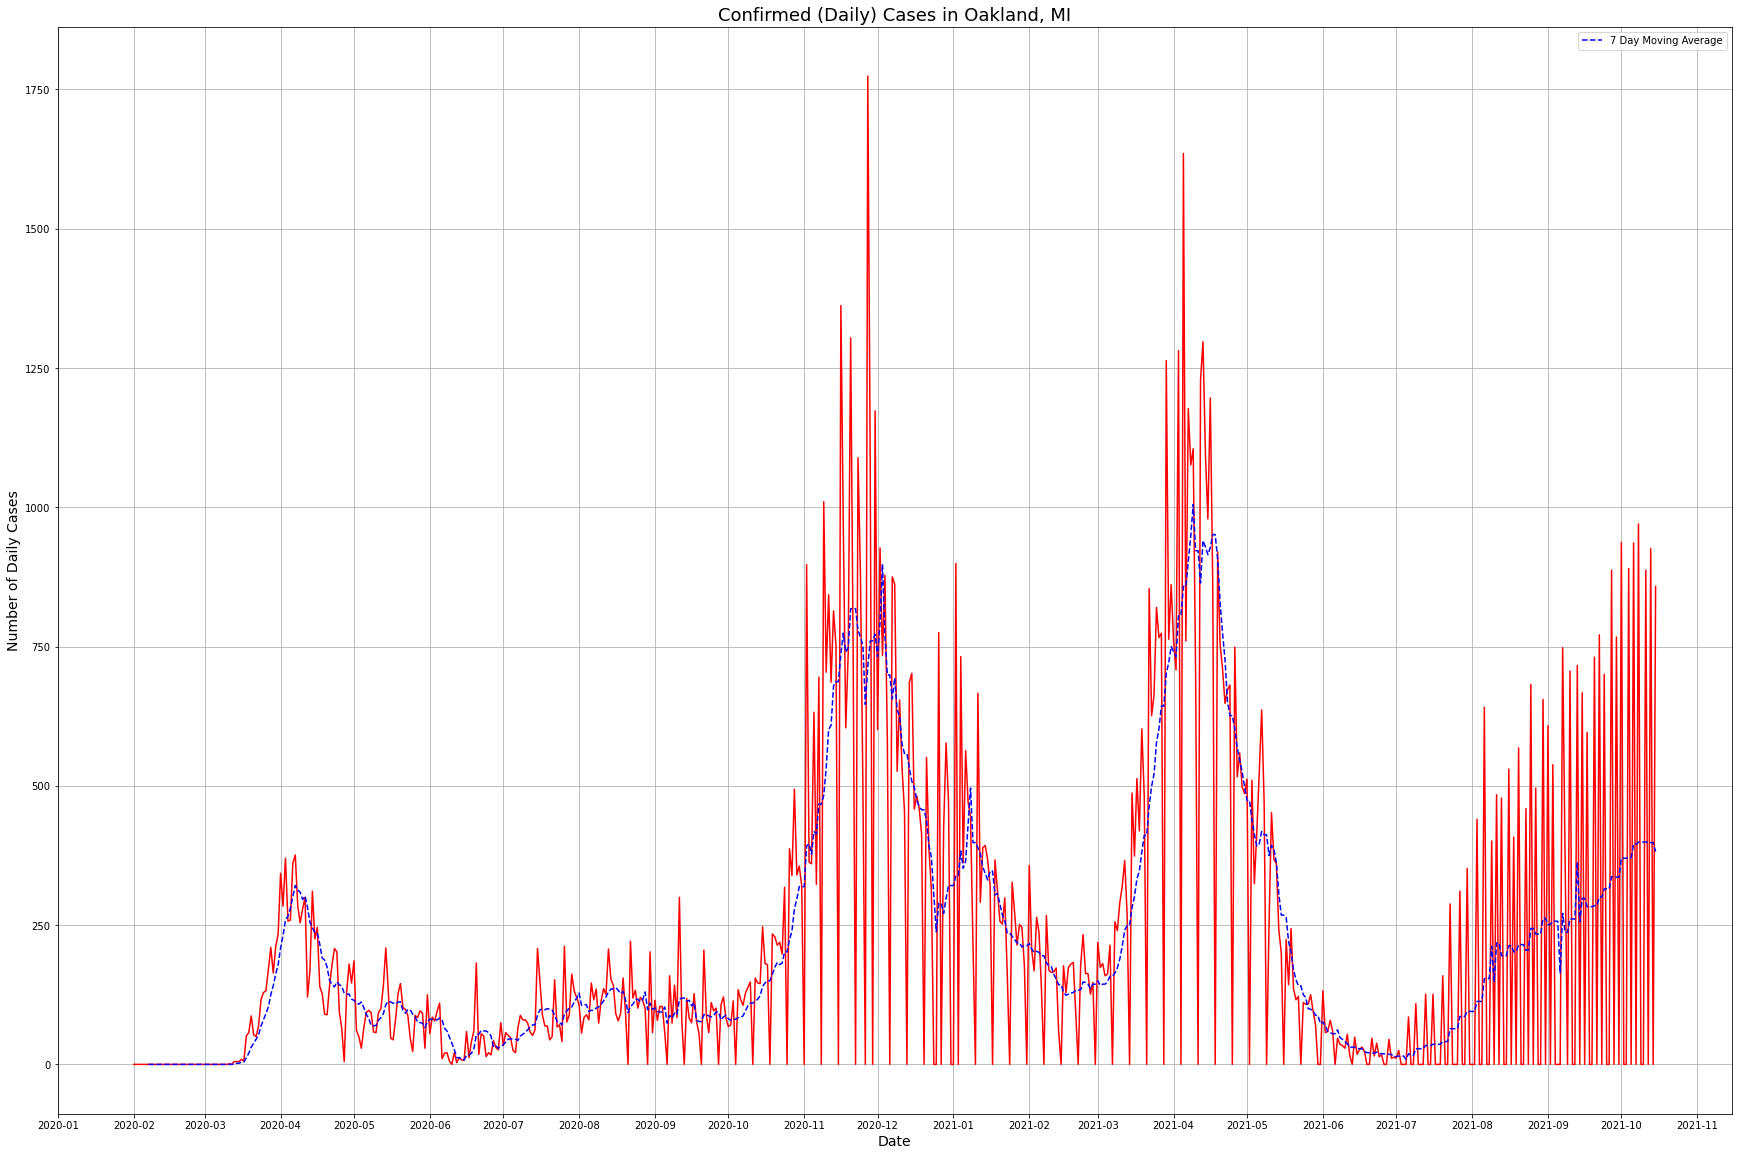

In [69]:
plt.figure(figsize=(30,20))
ax = plt.gca()
# ax2 = ax.twinx()

# Create lines and choose characteristics
ax.plot('Date', 'Cases', 'r', data=oakland_cases_df, label='')
ax.plot('Date', 'Cases Moving Average', 'b--', data=oakland_cases_df, label='7 Day Moving Average')

# format the x-ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)

# Add title and axis names
plt.title(f'Confirmed (Daily) Cases in Oakland, MI', fontsize=18)
plt.xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Daily Cases', fontsize=14)
# ax2.set_ylabel('Number of Deaths', fontsize=14)

plt.grid()
ax.legend()

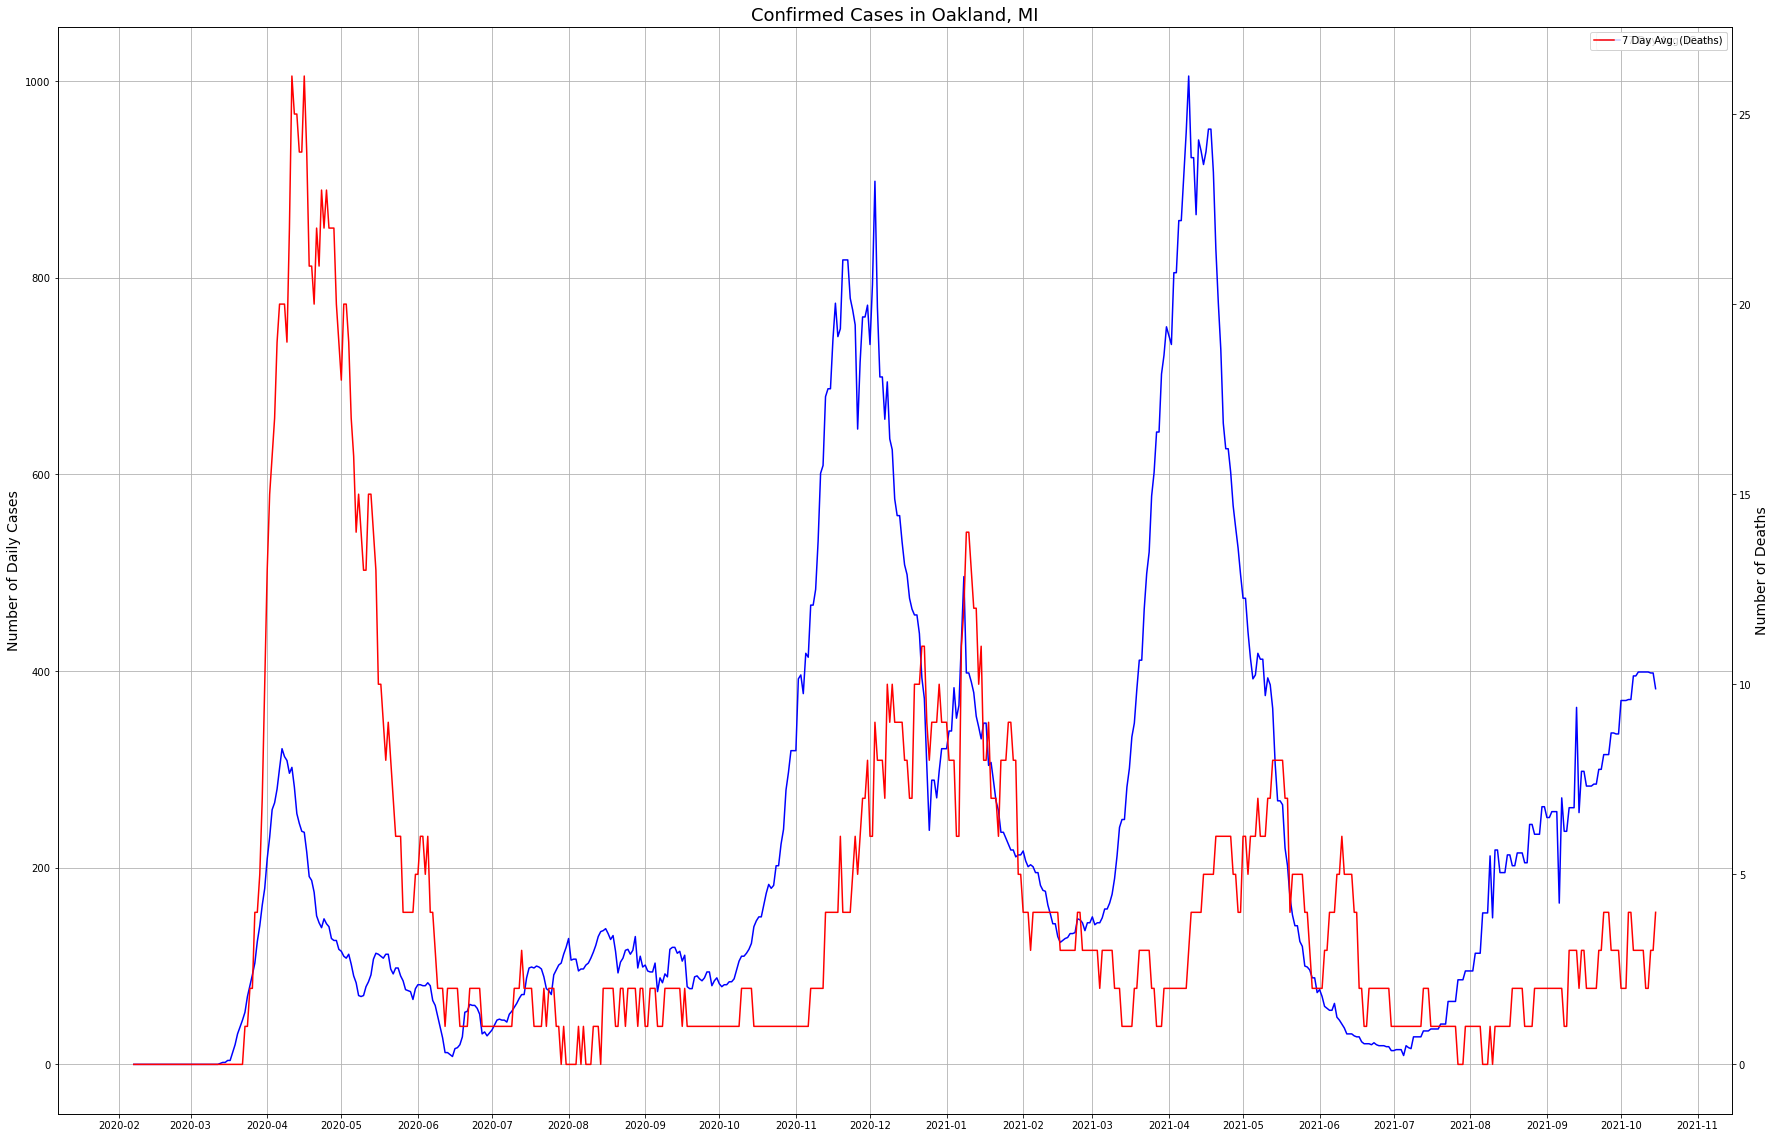

In [70]:
plt.figure(figsize=(30,20))
ax = plt.gca()
ax2 = ax.twinx()

# Create lines and choose characteristics
ax.plot('Date', 'Cases Moving Average', 'b', data=oakland_cases_df, label='7 Day Avg. (Cases)')
ax2.plot('Date', 'Deaths Moving Average', 'r', data=oakland_cases_df, label='7 Day Avg. (Deaths)')

# format the x-ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)

# Add title and axis names
plt.title(f'Confirmed Cases in Oakland, MI', fontsize=18)
plt.xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Daily Cases', fontsize=14)
ax2.set_ylabel('Number of Deaths', fontsize=14)

ax.grid()
ax.legend()
ax2.legend()

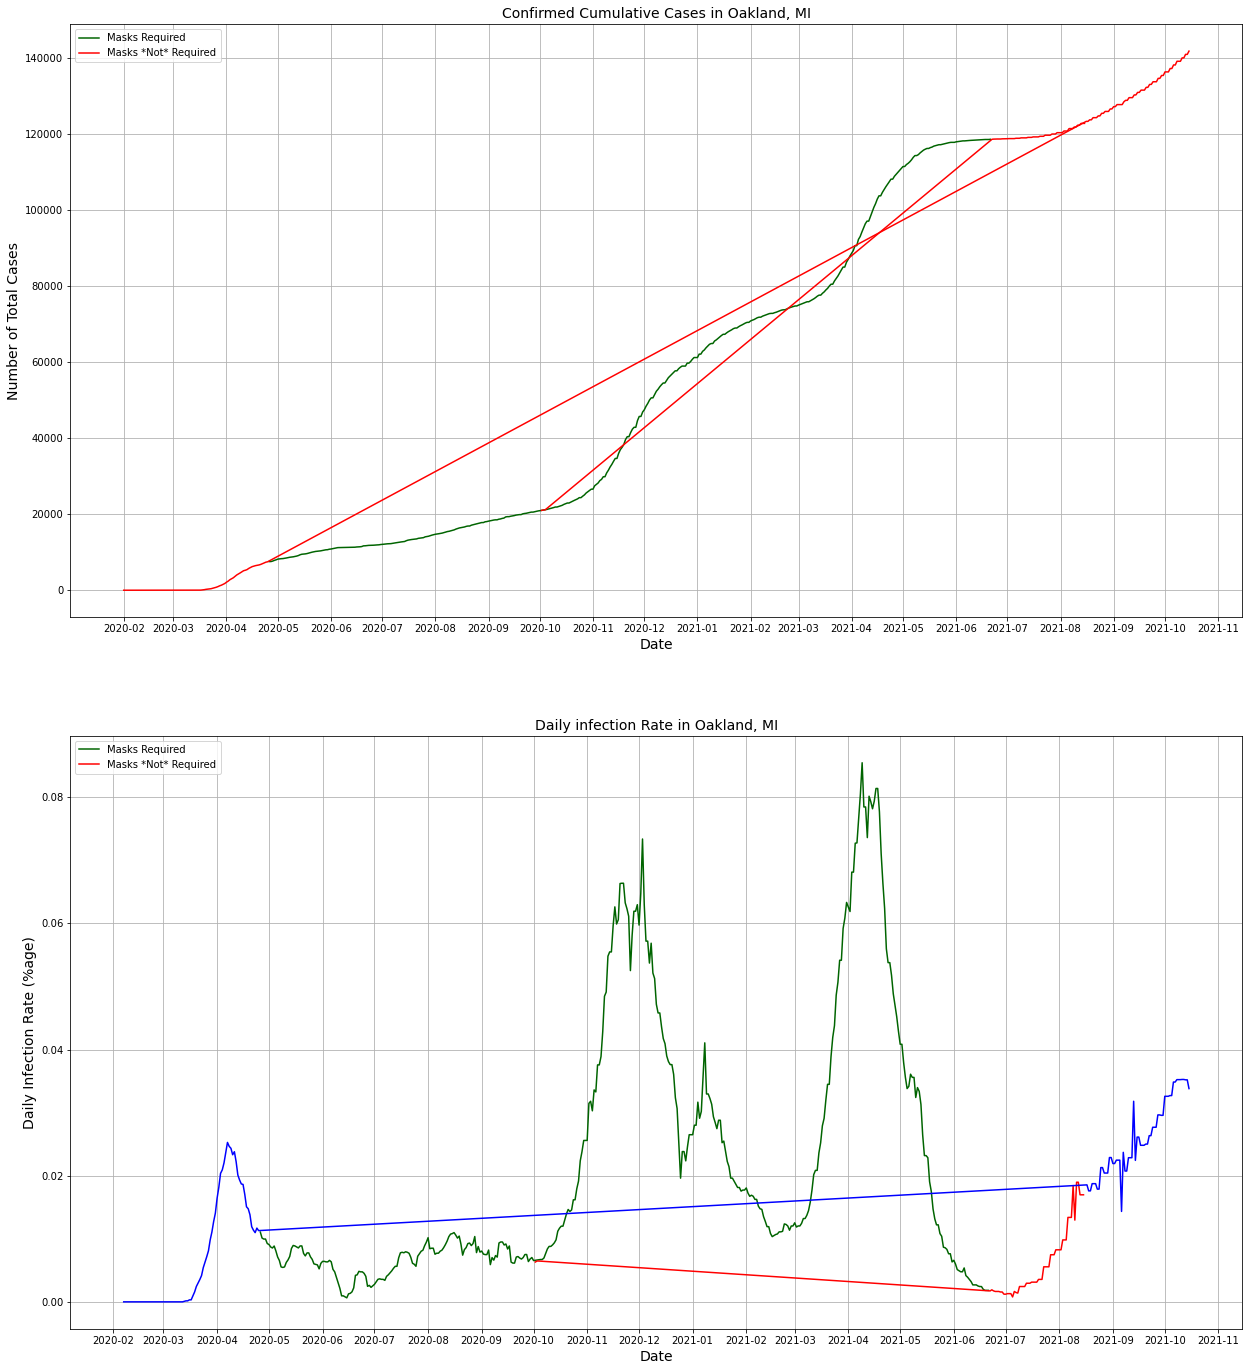

In [94]:
fig, (ax, ax2) = plt.subplots(2)

# ax.plot('Date', 'Cases Moving Average', 'darkgreen', data=mask_enforced_philly_combined_df, label='Masks Required')
# ax.plot('Date', 'Cases Moving Average', 'r', data=pre_mask_enforced_philly_combined_df, label='Masks *Not* Required')
# ax.plot('Date', 'Cases Moving Average', 'r', data=post_mask_enforced_philly_combined_df, label='')

ax.plot('Date', 'Cases Cumulative', 'darkgreen', data=masks_enforced_df, label='Masks Required')
ax.plot('Date', 'Cases Cumulative', 'r', data=masks_not_enforced_df, label='Masks *Not* Required')
ax.plot('Date', 'Cases Cumulative', 'r', data=masks_na_df, label='')

ax2.plot('Date', 'Rate of Infection', 'darkgreen', data=masks_enforced_df, label='Masks Required')
ax2.plot('Date', 'Rate of Infection', 'r', data=masks_not_enforced_df, label='Masks *Not* Required')
ax2.plot('Date', 'Rate of Infection', 'blue', data=masks_na_df, label='')

# ax3.plot('Date', 'Rate of Cases', 'darkgreen', data=oakland_cases_df, label='Masks Required')
# ax3.plot('Date', 'Rate of Cases', 'r', data=oakland_cases_df, label='Masks *Not* Required')
# ax3.plot('Date', 'Rate of Cases', 'r', data=oakland_cases_df, label='')

# ax3.axhline(y=3*case_rate_std, color='b', linestyle='dashdot', label='Rate of Change (std-dev)')
# ax3.axhline(y=-3*case_rate_std, color='b', linestyle='dashdot')

ax.legend(loc=2)
ax2.legend(loc=2)
# ax3.legend(loc=2)

# format the x-ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.grid()

ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.grid()

# ax3.xaxis.set_major_locator(months)
# ax3.xaxis.set_major_formatter(yearsFmt)
# ax3.grid()

ax.set_title(f'Confirmed Cumulative Cases in Oakland, MI', fontsize=14)
ax2.set_title(f'Daily infection Rate in Oakland, MI', fontsize=14)
# ax3.set_title(f'Rate of Change in Daily Cases in Oakland, MI', fontsize=14)

ax.set_xlabel('Date', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
# ax3.set_xlabel('Date', fontsize=14)

ax.set_ylabel('Number of Total Cases', fontsize=14)
ax2.set_ylabel('Daily Infection Rate (%age)', fontsize=14)
# ax3.set_ylabel('Rate of Change in Daily Cases (%age)', fontsize=14)

fig.set_size_inches(21, 24)

Text(0, 0.5, 'Daily Infection Rate (%age)')

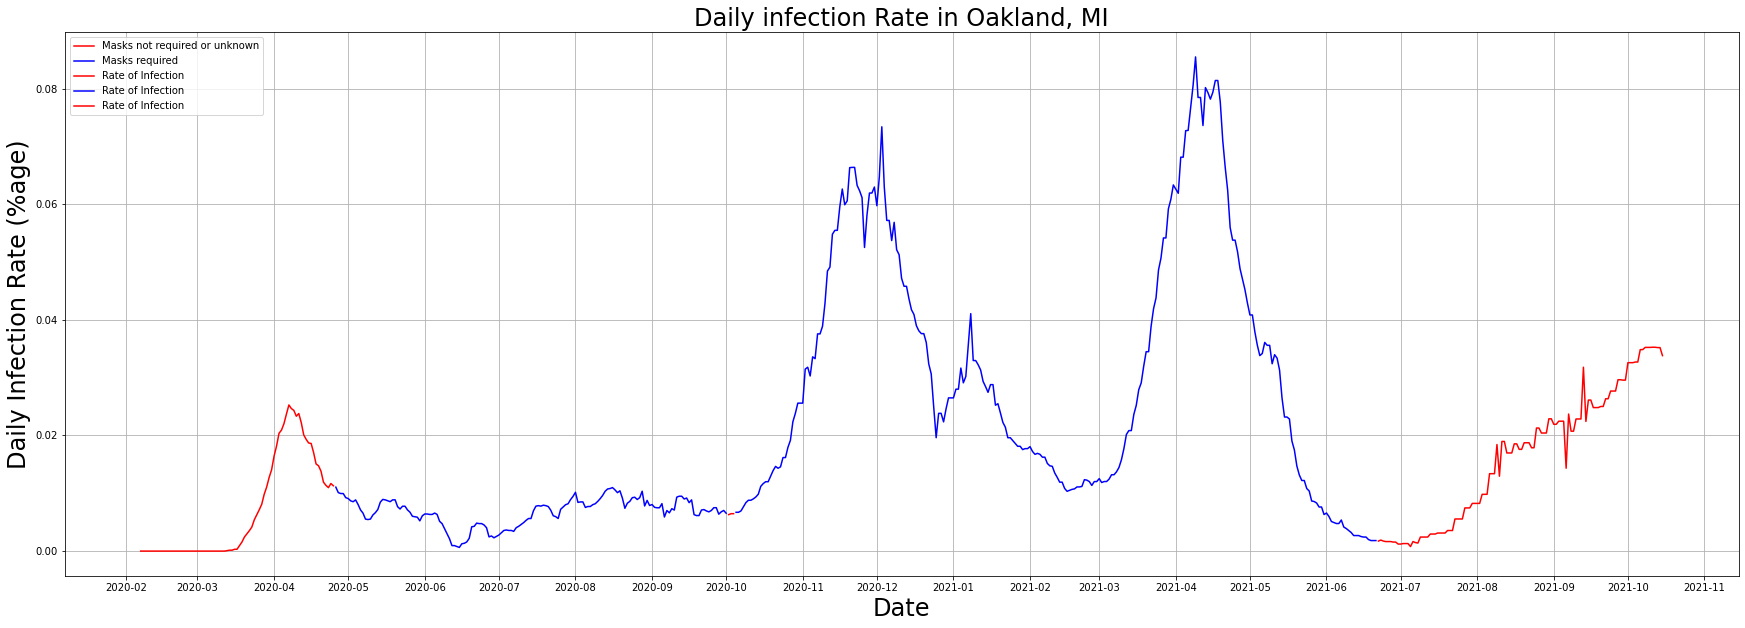

In [116]:
# df's to plot w/ differentiating colors:
# pre_mask_df
# mask1_df
# no_mask_df
# mask2_df
# post_mask_df

plt.figure(figsize=(30,10))
ax = plt.gca()


ax.plot('Date', 'Rate of Infection', c='r', data=pre_mask_df, label='Masks not required or unknown')
ax.plot('Date', 'Rate of Infection', c='b', data=mask1_df, label='Masks required')
ax.plot('Date', 'Rate of Infection', c='r', data=no_mask_df)
ax.plot('Date', 'Rate of Infection', c='b', data=mask2_df)
ax.plot('Date', 'Rate of Infection', c='r', data=post_mask_df)

ax.legend(loc=2)

# format the x-ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')


ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.grid()


ax.set_title(f'Daily infection Rate in Oakland, MI', fontsize=24)

ax.set_xlabel('Date', fontsize=24)

ax.set_ylabel('Daily Infection Rate (%age)', fontsize=24)



In [14]:
case_rate_mean = oakland_cases_df['Rate of Cases'].mean()
case_rate_std = oakland_cases_df['Rate of Cases'].std()

print(case_rate_mean)
print(case_rate_std)

4.866072686489434e-05
0.0018246068473339921


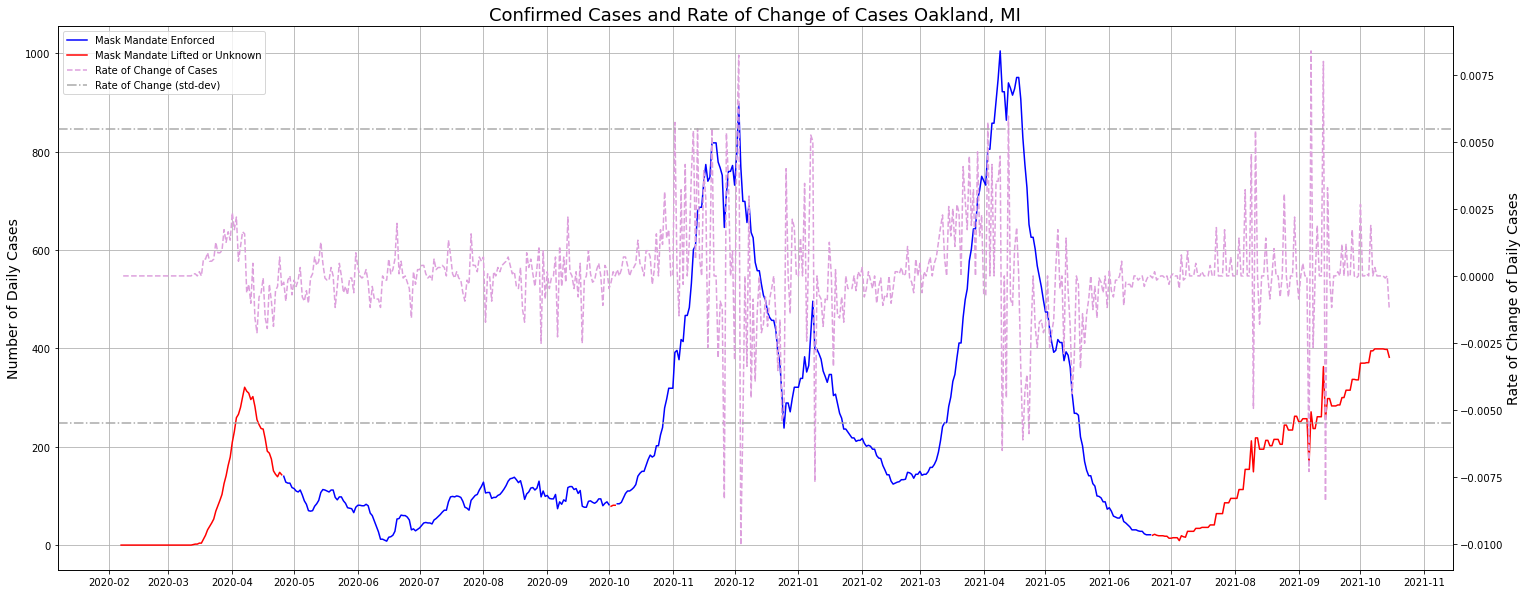

In [22]:
case_rate_mean = oakland_cases_df['Rate of Cases'].mean()
case_rate_std = oakland_cases_df['Rate of Cases'].std()

# Cut the df so that we can get different colored lines for pre/during/post mask mandates
# pre_mask_df
# mask1_df
# no_mask_df
# mask2_df
# post_mask_df

plt.figure(figsize=(25,10))
ax = plt.gca()
ax2 = ax.twinx()

# Create lines and choose characteristics
ax.plot('Date', 'Cases Moving Average', 'blue', data=mask1_df, label='Mask Mandate Enforced')
ax.plot('Date', 'Cases Moving Average', 'blue', data=mask2_df, label='')
ax.plot('Date', 'Cases Moving Average', 'r', data=pre_mask_df, label='Mask Mandate Lifted or Unknown')
ax.plot('Date', 'Cases Moving Average', 'r', data=no_mask_df, label='')
ax.plot('Date', 'Cases Moving Average', 'r', data=post_mask_df, label='')
# ax2.plot('Date', 'Rate of Daily Infection', color='plum', ls='--', data=oakland_combined_df, label='Rate of Infection')
ax2.plot('Date', 'Rate of Cases', color='plum', ls='--', data=oakland_combined_df, label='Rate of Change of Cases')

ax2.axhline(y=3*case_rate_std, color='darkgray', linestyle='dashdot', label='Rate of Change (std-dev)')
ax2.axhline(y=-3*case_rate_std, color='darkgray', linestyle='dashdot')

# format the x-ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)

# Add title and axis names
plt.title(f'Confirmed Cases and Rate of Change of Cases Oakland, MI', fontsize=18)
plt.xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Daily Cases', fontsize=14)
ax2.set_ylabel('Rate of Change of Daily Cases', fontsize=14)

ax.grid()

# Add legend for both the axes
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax.legend(lines, labels, loc=2)